In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

The dataset contains market and portfolio financials that are anonymized and normalized .The goal of this dataset is to create a model that forecasts the next days in the submission file to predict accurately using RMSLE of col-predict

This dataset was provided by the Investment and Treasury department from the Central Bank of Oman.

In [2]:
df=pd.read_csv("../input/al-majlis-ai-hackathon-investment/InvestmentDatasetMasked.csv")

## Data Exploration

In [3]:
df

,Masked Date,col-A1,col-A2,col-A3,col-A4,col-B1,col-B2,col-B3,col-B4,col-C1,...,col-O,col-P,col-Q,col-R,col-S,col-T,col-U,col-V,col-W,col-Predict
0,1,3257.498203,271.680775,5527.909694,1413.758249,0.629374,0,755.092422,198.533016,1.894615,...,0.000000,4118.743187,0,54,500,300,1052.016676,150,12152.60784,18572.65196
1,2,3257.513931,271.680775,5528.097452,1413.758249,0.629495,0,755.304910,198.533016,1.892512,...,0.000000,4162.411187,0,54,500,300,1052.016676,150,12152.43784,18616.14996
2,3,3452.847560,271.680775,5518.302656,1413.758249,0.626721,0,751.327892,198.533016,1.887185,...,0.000000,4162.411187,0,54,500,300,907.006226,0,12330.84784,18499.54951
3,4,3453.059692,271.680775,5519.813443,1413.758249,0.626555,0,751.276687,198.533016,1.896529,...,0.000000,4162.411187,0,50,500,300,945.005203,0,12334.35784,18537.05848
4,5,3451.725408,271.684861,5512.606946,1413.758249,0.627387,0,752.435697,198.533016,1.897229,...,0.000000,4162.411308,0,50,500,300,814.005091,0,12324.53784,18396.23849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,171,2984.419329,671.430659,5321.198052,1413.758249,1.202632,0,661.424272,198.533016,486.517450,...,50.035559,2664.048655,200,40,500,300,126.042057,0,12173.82214,16563.09924
119,172,2747.749478,671.340740,5317.088667,1413.758249,1.200690,0,660.261411,198.533016,485.170086,...,50.035559,2664.048655,200,40,500,300,141.027969,0,11924.96143,16332.30515
120,173,2666.147481,671.872696,5336.118716,1413.758249,1.206973,0,665.722596,198.533016,485.526741,...,50.035559,2664.048655,200,40,500,300,233.032066,0,11870.13143,16369.47925
121,176,2546.791516,672.074874,5341.202466,1413.758249,1.195427,0,668.522651,198.533016,485.764511,...,50.035559,2732.843855,250,40,500,300,226.053911,0,11763.70143,16374.86629


In [4]:
df.columns

Index(['Masked Date', 'col-A1', 'col-A2', 'col-A3', 'col-A4', 'col-B1',
       'col-B2', 'col-B3', 'col-B4', 'col-C1', 'col-C2', 'col-C3', 'col-C4',
       'col-D1', 'col-D2', 'col-D3', 'col-D4', 'col-E1', 'col-E2', 'col-E3',
       'col-E4', 'col-F1', 'col-F2', 'col-F3', 'col-F4', 'col-G', 'col-H',
       'col-I', 'col-J', 'col-L', 'col-M', 'col-N', 'col-N1', 'col-O', 'col-P',
       'col-Q', 'col-R', 'col-S', 'col-T', 'col-U', 'col-V', 'col-W',
       'col-Predict'],
      dtype='object')

In [5]:
len(df.columns)

43

There are a total of 43 columns in the dataset where the value to predict or Y is in the column 'col-Predict' 

In [6]:
df.tail()

,Masked Date,col-A1,col-A2,col-A3,col-A4,col-B1,col-B2,col-B3,col-B4,col-C1,...,col-O,col-P,col-Q,col-R,col-S,col-T,col-U,col-V,col-W,col-Predict
118,171,2984.419329,671.430659,5321.198052,1413.758249,1.202632,0,661.424272,198.533016,486.517450,...,50.035559,2664.048655,200,40,500,300,126.042057,0,12173.82214,16563.09924
119,172,2747.749478,671.340740,5317.088667,1413.758249,1.200690,0,660.261411,198.533016,485.170086,...,50.035559,2664.048655,200,40,500,300,141.027969,0,11924.96143,16332.30515
120,173,2666.147481,671.872696,5336.118716,1413.758249,1.206973,0,665.722596,198.533016,485.526741,...,50.035559,2664.048655,200,40,500,300,233.032066,0,11870.13143,16369.47925
121,176,2546.791516,672.074874,5341.202466,1413.758249,1.195427,0,668.522651,198.533016,485.764511,...,50.035559,2732.843855,250,40,500,300,226.053911,0,11763.70143,16374.86629
122,177,2396.866256,672.091205,5341.500873,1413.758249,1.197129,0,669.486975,198.533016,486.200423,...,50.035559,2732.843855,250,40,500,300,226.053911,0,11615.59143,16226.75629


In [7]:
df.head()

,Masked Date,col-A1,col-A2,col-A3,col-A4,col-B1,col-B2,col-B3,col-B4,col-C1,...,col-O,col-P,col-Q,col-R,col-S,col-T,col-U,col-V,col-W,col-Predict
0,1,3257.498203,271.680775,5527.909694,1413.758249,0.629374,0,755.092422,198.533016,1.894615,...,0.0,4118.743187,0,54,500,300,1052.016676,150,12152.60784,18572.65196
1,2,3257.513931,271.680775,5528.097452,1413.758249,0.629495,0,755.304910,198.533016,1.892512,...,0.0,4162.411187,0,54,500,300,1052.016676,150,12152.43784,18616.14996
2,3,3452.847560,271.680775,5518.302656,1413.758249,0.626721,0,751.327892,198.533016,1.887185,...,0.0,4162.411187,0,54,500,300,907.006226,0,12330.84784,18499.54951
3,4,3453.059692,271.680775,5519.813443,1413.758249,0.626555,0,751.276687,198.533016,1.896529,...,0.0,4162.411187,0,50,500,300,945.005203,0,12334.35784,18537.05848
4,5,3451.725408,271.684861,5512.606946,1413.758249,0.627387,0,752.435697,198.533016,1.897229,...,0.0,4162.411308,0,50,500,300,814.005091,0,12324.53784,18396.23849


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Masked Date,123.0,86.804878,5.216692e+01,1.000000,43.500000,85.000000,134.500000,177.000000
col-A1,123.0,2923.657614,5.635338e+02,2009.439413,2433.216130,2989.535722,3452.286484,3802.042016
col-A2,123.0,610.035247,1.090932e+02,271.680775,471.791243,671.753131,671.864650,672.946484
col-A3,123.0,5416.735256,6.228239e+01,5290.479546,5366.919523,5395.018362,5471.538443,5528.097452
col-A4,123.0,1413.758249,0.000000e+00,1413.758249,1413.758249,1413.758249,1413.758249,1413.758249
col-B1,123.0,0.722127,3.831129e-01,0.105940,0.430857,0.618238,1.201604,1.265483
col-B2,123.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
col-B3,123.0,713.227480,3.196025e+01,654.877245,684.550904,717.175976,743.558333,763.478468
col-B4,123.0,198.533016,0.000000e+00,198.533016,198.533016,198.533016,198.533016,198.533016
col-C1,123.0,273.903657,2.499256e+02,1.811931,1.892491,484.173052,498.500971,524.961503


In [9]:
df.isnull().sum()

Masked Date    0
col-A1         0
col-A2         0
col-A3         0
col-A4         0
col-B1         0
col-B2         0
col-B3         0
col-B4         0
col-C1         0
col-C2         0
col-C3         0
col-C4         0
col-D1         0
col-D2         0
col-D3         0
col-D4         0
col-E1         0
col-E2         0
col-E3         0
col-E4         0
col-F1         0
col-F2         0
col-F3         0
col-F4         0
col-G          0
col-H          0
col-I          0
col-J          0
col-L          0
col-M          0
col-N          0
col-N1         0
col-O          0
col-P          0
col-Q          0
col-R          0
col-S          0
col-T          0
col-U          0
col-V          0
col-W          0
col-Predict    0
dtype: int64

Here the data has no null values 

In [10]:
df.nunique()

Masked Date    120
col-A1         120
col-A2          72
col-A3         120
col-A4           1
col-B1         117
col-B2           1
col-B3         120
col-B4           1
col-C1         119
col-C2           1
col-C3         120
col-C4           1
col-D1           1
col-D2           1
col-D3         120
col-D4           1
col-E1           1
col-E2           1
col-E3         120
col-E4           1
col-F1           1
col-F2           1
col-F3           1
col-F4           1
col-G          120
col-H          120
col-I            2
col-J            3
col-L            1
col-M            8
col-N            5
col-N1           2
col-O            7
col-P           17
col-Q            5
col-R            4
col-S            2
col-T            1
col-U           92
col-V           10
col-W          120
col-Predict    121
dtype: int64

In [11]:
df.dtypes

Masked Date      int64
col-A1         float64
col-A2         float64
col-A3         float64
col-A4         float64
col-B1         float64
col-B2           int64
col-B3         float64
col-B4         float64
col-C1         float64
col-C2           int64
col-C3         float64
col-C4         float64
col-D1           int64
col-D2           int64
col-D3         float64
col-D4         float64
col-E1           int64
col-E2           int64
col-E3         float64
col-E4         float64
col-F1           int64
col-F2           int64
col-F3           int64
col-F4         float64
col-G          float64
col-H          float64
col-I          float64
col-J            int64
col-L            int64
col-M          float64
col-N          float64
col-N1         float64
col-O          float64
col-P          float64
col-Q            int64
col-R            int64
col-S            int64
col-T            int64
col-U          float64
col-V            int64
col-W          float64
col-Predict    float64
dtype: obje

All the datatypes are either int or float

Here we dont know what each column represent. But as told all the columns play an important role in the prediction process. Thus all the data columns are considered to make the prediction.
Thus, here we assume that all the columns are important
Moreover as seen there are no much data changes needed in the dataset

## Training the dataset

For training the data we use all the columns except the prediction column

In [12]:
#splitting the data into train and test dataset
X=df[['Masked Date', 'col-A1', 'col-A2', 'col-A3', 'col-A4', 'col-B1',
       'col-B2', 'col-B3', 'col-B4', 'col-C1', 'col-C2', 'col-C3', 'col-C4',
       'col-D1', 'col-D2', 'col-D3', 'col-D4', 'col-E1', 'col-E2', 'col-E3',
       'col-E4', 'col-F1', 'col-F2', 'col-F3', 'col-F4', 'col-G', 'col-H',
       'col-I', 'col-J', 'col-L', 'col-M', 'col-N', 'col-N1', 'col-O', 'col-P',
       'col-Q', 'col-R', 'col-S', 'col-T', 'col-U', 'col-V', 'col-W']]
y=df['col-Predict']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Using linear regression to train the data
lr= LinearRegression()
lr.fit(X_train,y_train)
y_predictions = lr.predict(X_test)


In [14]:
lr.score(X_test,y_test)

0.9926883770373719

The dataset has a score of 99% after training the data

## Predicting the data

The predict has the dataset that will be used to make predictions.
But only the 'Masked Date' and the prediction column is given as shown below to make the next 20 days prediction of the investment

In [15]:
predict=pd.read_csv("../input/al-majlis-ai-hackathon-investment-submission/submissionFile.csv")
predict

,Masked Date,col-Predict
0,178,NaN
1,179,NaN
2,180,NaN
3,183,NaN
4,184,NaN
5,185,NaN
6,186,NaN
7,187,NaN
8,193,NaN
9,194,NaN


In [16]:
len(predict)

20

Here predict_data will only have the 'masked data' column to make prediction for the next 20 days

In [17]:
predict_data=predict.iloc[:,:1]
predict_data

,Masked Date
0,178
1,179
2,180
3,183
4,184
5,185
6,186
7,187
8,193
9,194


In [18]:
for i in range(1,42):
    X=df['Masked Date']
    y=df.iloc[:,i]
    X=X.values.reshape(-1, 1)
    lr_predict = LinearRegression()
    lr_predict.fit(X,y)
   
    predict_value=predict_data.iloc[:,:1]
    predictions = lr_predict.predict(predict_value)
    predict_data[i]=predictions

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegr

The following is the new dataset that was created from the prediction dataset to make the final prediction

In [19]:
predict_data

,Masked Date,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,178,2328.299301,749.499240,5313.672656,1413.758249,1.170978,0.0,659.044947,198.533016,640.709111,...,658.473046,53.478505,2504.798839,47.530230,38.929405,503.324424,300.0,132.126228,-3.005972,11464.283317
1,179,2321.770901,751.028532,5312.542523,1413.758249,1.175900,0.0,658.450809,198.533016,644.731316,...,662.684324,53.341857,2495.698325,47.917697,38.957605,503.405453,300.0,129.229910,-3.177206,11458.202202
2,180,2315.242500,752.557824,5311.412390,1413.758249,1.180822,0.0,657.856671,198.533016,648.753521,...,666.895601,53.205210,2486.597811,48.305164,38.985804,503.486483,300.0,126.333592,-3.348441,11452.121087
3,183,2295.657297,757.145701,5308.021991,1413.758249,1.195588,0.0,656.074255,198.533016,660.820135,...,679.529433,52.795267,2459.296269,49.467566,39.070404,503.729570,300.0,117.644637,-3.862143,11433.877742
4,184,2289.128896,758.674993,5306.891859,1413.758249,1.200509,0.0,655.480117,198.533016,664.842340,...,683.740711,52.658620,2450.195755,49.855033,39.098603,503.810599,300.0,114.748319,-4.033378,11427.796627
5,185,2282.600495,760.204285,5305.761726,1413.758249,1.205431,0.0,654.885978,198.533016,668.864545,...,687.951988,52.521972,2441.095241,50.242500,39.126803,503.891628,300.0,111.852001,-4.204612,11421.715512
6,186,2276.072094,761.733578,5304.631593,1413.758249,1.210353,0.0,654.291840,198.533016,672.886749,...,692.163266,52.385325,2431.994727,50.629967,39.155003,503.972658,300.0,108.955683,-4.375846,11415.634397
7,187,2269.543694,763.262870,5303.501460,1413.758249,1.215275,0.0,653.697701,198.533016,676.908954,...,696.374543,52.248677,2422.894213,51.017434,39.183203,504.053687,300.0,106.059365,-4.547080,11409.553282
8,193,2230.373288,772.438623,5296.720663,1413.758249,1.244806,0.0,650.132870,198.533016,701.042183,...,721.642208,51.428793,2368.291129,53.342237,39.352401,504.539862,300.0,88.681456,-5.574486,11373.066592
9,194,2223.844888,773.967915,5295.590530,1413.758249,1.249728,0.0,649.538732,198.533016,705.064388,...,725.853485,51.292145,2359.190615,53.729704,39.380601,504.620891,300.0,85.785137,-5.745720,11366.985477


Predicting the data using the trained model

In [20]:
#changing the datacolumns name to the actual datasets instead of the numbers

In [21]:
predict_data.columns = [['Masked Date', 'col-A1', 'col-A2', 'col-A3', 'col-A4', 'col-B1',
       'col-B2', 'col-B3', 'col-B4', 'col-C1', 'col-C2', 'col-C3', 'col-C4',
       'col-D1', 'col-D2', 'col-D3', 'col-D4', 'col-E1', 'col-E2', 'col-E3',
       'col-E4', 'col-F1', 'col-F2', 'col-F3', 'col-F4', 'col-G', 'col-H',
       'col-I', 'col-J', 'col-L', 'col-M', 'col-N', 'col-N1', 'col-O', 'col-P',
       'col-Q', 'col-R', 'col-S', 'col-T', 'col-U', 'col-V', 'col-W']]

In [22]:
predictions = lr.predict(predict_data)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
#predicted values
predictions

array([15785.6546936 , 15770.27488708, 15754.89521027, 15708.75583649,
       15693.37602234, 15677.99627686, 15662.61647797, 15647.23667145,
       15554.95805359, 15539.57824707, 15493.43888092, 15478.05918884,
       15462.67938232, 15447.29957581, 15431.91976929, 15385.78046417,
       15370.40058899, 15355.02090454, 15339.64115906, 15324.26128387])

In [24]:
#reading the submission csv file again and replacing the null values to the predicted value
#predict=pd.read_csv("submissionFile.csv")
predict['col-Predict']=predictions

In [25]:
#final predicted dataset
predict

,Masked Date,col-Predict
0,178,15785.654694
1,179,15770.274887
2,180,15754.895210
3,183,15708.755836
4,184,15693.376022
5,185,15677.996277
6,186,15662.616478
7,187,15647.236671
8,193,15554.958054
9,194,15539.578247


In [26]:
#exporting the dataset to make predictions
predict.to_csv('submissionFile_complete.csv')

In [27]:
df['col-Predict']

0      18572.65196
1      18616.14996
2      18499.54951
3      18537.05848
4      18396.23849
          ...     
118    16563.09924
119    16332.30515
120    16369.47925
121    16374.86629
122    16226.75629
Name: col-Predict, Length: 123, dtype: float64

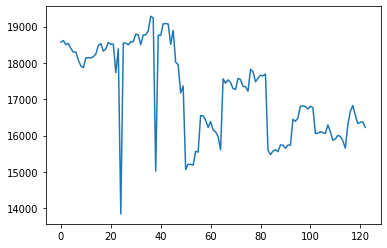

In [28]:
#Trained data visaulization
plt.plot(df['col-Predict'])

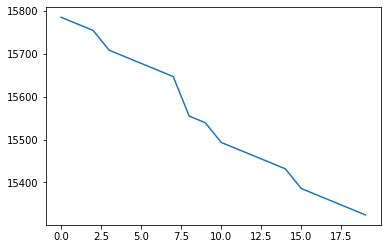

In [29]:
#Predicted data visualization
plt.plot(predict['col-Predict'])

In [30]:
#combining the trained data and the predicted data for visualization
dft = [df['col-Predict'], predict['col-Predict']]
df3= pd.concat(dft)
df3= df3.reset_index()
df3.drop("index",axis=1, inplace=True)

In [31]:
df3

,col-Predict
0,18572.651960
1,18616.149960
2,18499.549510
3,18537.058480
4,18396.238490
...,...
138,15385.780464
139,15370.400589
140,15355.020905
141,15339.641159


**Displaying trained data and predicted data in graph to understand the trends**

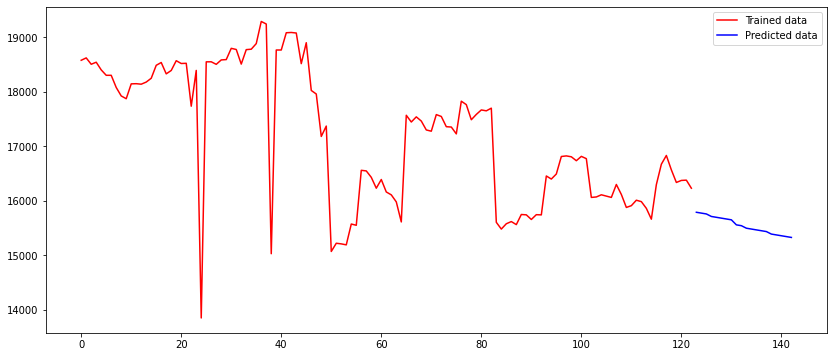

In [32]:
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(np.where(df3.index<=122, df3['col-Predict'], None), color="red", label="Trained data")
plt.plot(np.where(df3.index>122, df3['col-Predict'], None), color="blue", label="Predicted data")
plt.legend()

**It is forecasted that the value of the investments will go down or show a decline in value as shown in the graph above**


In conclusion the predicted dataset was submitted to the Al Majlis AI Hackathon - Investment challenge which is the first AI Hackathon with real datasets from the Industry in Oman.
The final dataset got an RMSLE rate of 0.04090 which had lead me to winning the challenge in the hackathon.